# Predictions on different data quality

## Parameters and model

In [1]:
import sys

sys.path.append('..')
from timeseries.timeseries import StockMarketSeries
from timeseries.utils import SeriesColumn, DeviationSource
from predictions.model import PredictionModel

company_name = "Apple"
path = "../data/timeseries/apple.csv"
time_series_start = 0
time_series_end = 180
column = SeriesColumn.CLOSE
stock = StockMarketSeries(company_name, path, time_series_start, time_series_end,
                           weights={SeriesColumn.OPEN: 0.2,
                                    SeriesColumn.CLOSE: 0.2,
                                    SeriesColumn.ADJ_CLOSE: 0.25,
                                    SeriesColumn.HIGH: 0.15,
                                    SeriesColumn.LOW: 0.15,
                                    SeriesColumn.VOLUME: 0.05})

## Data - one price column

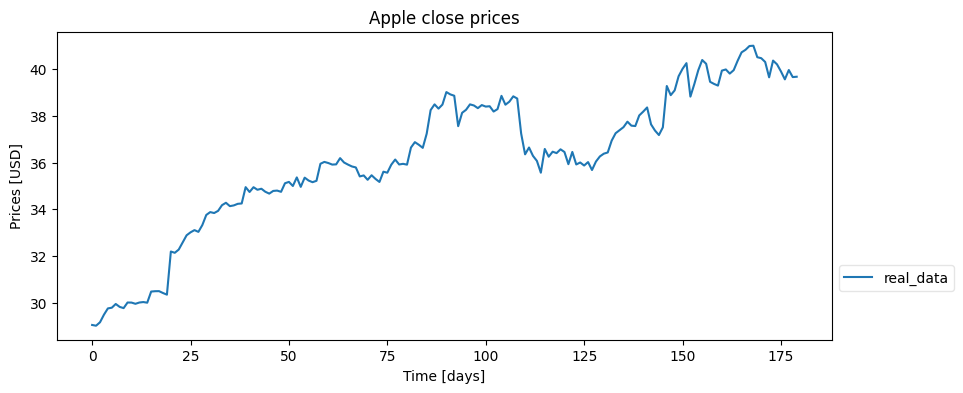

In [2]:
stock.plot_series("close prices", real_data=stock.real_series[SeriesColumn.CLOSE])

## Predictions parameters

In [3]:
prediction_start = 160
iterations = 3

model = PredictionModel(stock, prediction_start, column, iterations=iterations)

## Statistical methods

In [4]:
from arima import ManualArima

arima_type = ManualArima

## AR(5)

In [5]:
arima = model.configure_model(arima_type, p=5, q=0)

C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\predictio

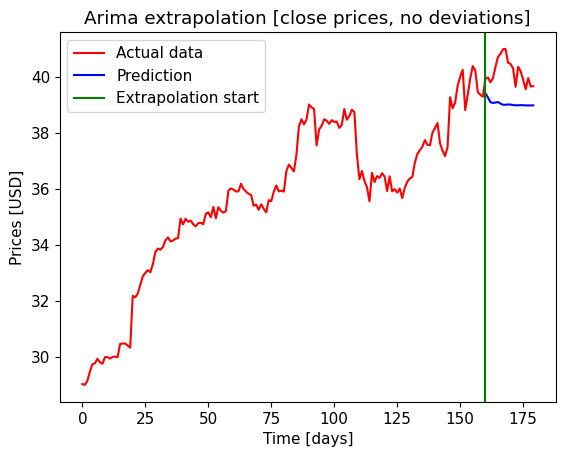

In [6]:
%%capture --no-stdout --no-display
arima.plot_prediction(source=DeviationSource.NONE)

In [7]:
%%capture --no-stdout --no-display
arima.compute_statistics_set()

Statistics [Apple stock, close price, 3 iterations]

  Deviation Scale        Time    Time SD   RMSE    MAE   MAPE MAPE SD
0         -     -  797.666667   8.736895   1.23   1.14  2.823     0.0
1         N     S         628  18.027756   0.87  0.746  1.845     0.0
2         N     M  637.333333  18.903263   1.18  1.083  2.681     0.0
3         N     H         686   2.645751  2.944  2.886  7.167     0.0
4         I     S         750  36.660606  1.215  1.124  2.784     0.0
5         I     M         687  10.583005  1.313  1.229  3.046     0.0
6         I     H  605.333333  14.224392  1.057  0.959  2.373     0.0
7         T     S         718    7.81025   1.23   1.14  2.823     0.0
8         T     M         750  44.305756   1.23   1.14  2.823     0.0
9         T     H  792.666667  13.576941   1.23   1.14  2.823     0.0
\begin{tabular}{llllllll}
\toprule
Deviation & Scale &  Time & Time SD & RMSE & MAE & MAPE & MAPE SD \\
\midrule
        - &     - & 797.7 &     8.7 &  1.2 & 1.1 &  2.8 &     0.

## ARIMA(5,1,5)

In [8]:
arima = model.configure_model(arima_type, p=5, q=2)

C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\predictio

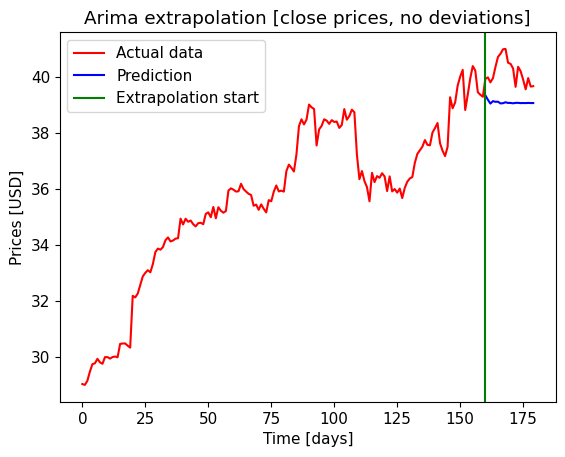

In [9]:
%%capture --no-stdout --no-display
arima.plot_prediction(source=DeviationSource.NONE)

In [10]:
%%capture --no-stdout --no-display
arima.compute_statistics_set()

Statistics [Apple stock, close price, 3 iterations]

  Deviation Scale         Time     Time SD   RMSE    MAE   MAPE MAPE SD
0         -     -  1740.666667   89.315919  1.186  1.096  2.713     0.0
1         N     S         3575  171.035084  0.692  0.554  1.366     0.0
2         N     M  3724.666667   68.369096  1.189  0.984  2.437     0.0
3         N     H  1756.666667   37.447741  2.874  2.823  7.011     0.0
4         I     S  2509.666667   17.039171  1.125  1.028  2.545     0.0
5         I     M  2466.333333   22.501852  1.328  1.245  3.086     0.0
6         I     H  3005.333333   15.143756   1.01  0.898  2.221     0.0
7         T     S  1647.333333   24.006943  1.186  1.096  2.713     0.0
8         T     M  1639.666667   12.013881  1.186  1.096  2.713     0.0
9         T     H  1648.666667    2.081666  1.186  1.096  2.713     0.0
\begin{tabular}{llllllll}
\toprule
Deviation & Scale &   Time & Time SD & RMSE & MAE & MAPE & MAPE SD \\
\midrule
        - &     - & 1740.7 &    89.3 &  1

## XGBoost

In [11]:
from ml import XGBoost

xgboost = model.configure_model(XGBoost, optimize=False)

C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\predictio

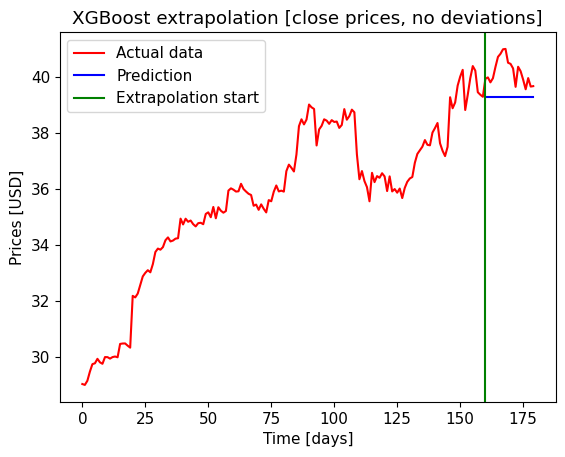

In [12]:
xgboost.plot_prediction(source=DeviationSource.NONE)

In [13]:
%%capture --no-stdout --no-display
xgboost.compute_statistics_set()

Statistics [Apple stock, close price, 3 iterations]

  Deviation Scale       Time    Time SD   RMSE    MAE    MAPE MAPE SD
0         -     -  52.333333   9.237604  1.001  0.898   2.222     0.0
1         N     S         52   8.660254  0.659  0.516   1.272     0.0
2         N     M  55.333333   7.637626  2.484  2.444   6.069     0.0
3         N     H  54.666667   8.020806  5.047  5.028  12.496     0.0
4         I     S         47        0.0  1.001  0.898   2.222     0.0
5         I     M  41.666667  10.066446  1.001  0.898   2.221     0.0
6         I     H  47.333333    0.57735  1.001  0.898   2.222     0.0
7         T     S  41.666667   4.725816  1.001  0.898   2.222     0.0
8         T     M  36.333333   9.237604  1.001  0.898   2.222     0.0
9         T     H  40.666667  10.969655  1.001  0.898   2.222     0.0
\begin{tabular}{llllllll}
\toprule
Deviation & Scale & Time & Time SD & RMSE & MAE & MAPE & MAPE SD \\
\midrule
        - &     - & 52.3 &     9.2 &  1.0 & 0.9 &  2.2 &     0.0 

## Reservoir computing

In [14]:
from predictions.ml import Reservoir

reservoir = model.configure_model(Reservoir)

C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\predictio

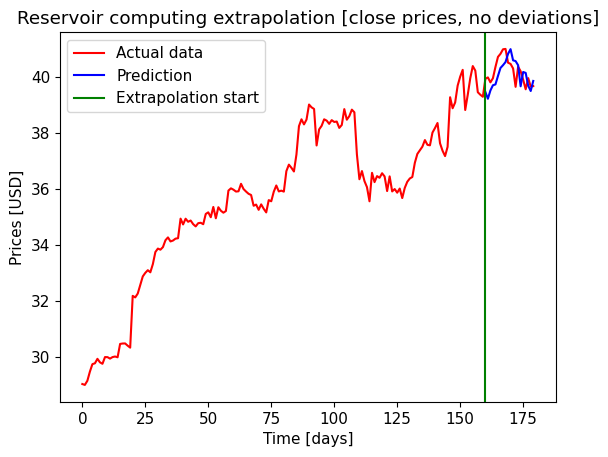

In [15]:
reservoir.plot_prediction(source=DeviationSource.NONE)

In [16]:
%%capture --no-stdout --no-display
reservoir.compute_statistics_set()

_LinAlgError: linalg.svd: The algorithm failed to converge because the input matrix is ill-conditioned or has too many repeated singular values (error code: 12).